## Variation With Respect to Each Variable

Let's now calculate the difference in cloud water content with respect to temperature using a heatmap. Let's begin by loading the needed data.

In [1]:
import xarray as xarr

filename = "./data/clipped_daily_pressure_1988.nc"
data = xarr.open_dataset(filename)

Then, we need to calculate the respective weighted averages.

In [2]:
from cdo import Cdo
cdo = Cdo()

# define output file
outputFile = "./data/spatial_avgs.nc"

spatial_avgs = xarr.open_dataset(outputFile)

# get data
clwc_data = spatial_avgs["clwc"].values
temp_data = spatial_avgs["t"].values

Per the [documentation](https://matplotlib.org/stable/gallery/statistics/hist.html), we need to get 1D arrays. We can do this by flattening them. Also, since we only changed one argument in downloading the data, we shouldn't have to align it.

In [3]:
temp_flat = temp_data.flatten()
clwc_flat = clwc_data.flatten()

We can now plot the relationship as follows:

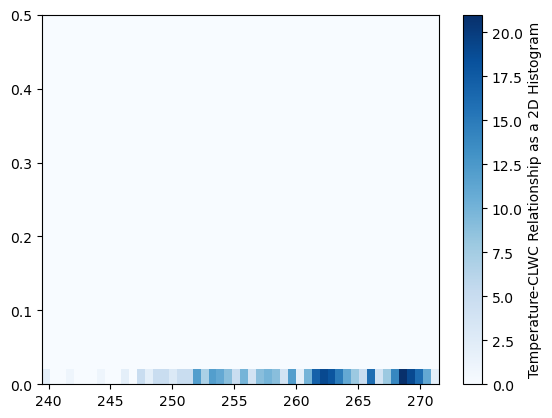

In [4]:
import matplotlib.pyplot as plot

plot.hist2d(temp_flat, clwc_flat, bins=50, cmap="Blues")
plot.colorbar(label="Temperature-CLWC Relationship as a 2D Histogram")
plot.savefig("./plots/Variation_Temperature-CWLC_1988.png")
plot.ylim(bottom=0)
plot.show()